In [77]:
!nvidia-smi

Tue Dec 13 17:31:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.72       Driver Version: 512.72       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8    10W /  N/A |   5829MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [78]:
import tensorflow as tf
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))
print("1.",tf.test.is_gpu_available)
print("2",tf.test.gpu_device_name)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# sess = tf.compat.v1.Session(config=tf.ConfigProto(log_device_placement=True))


Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1. <function is_gpu_available at 0x000001E59D848B88>
2 <function gpu_device_name at 0x000001E59D847048>
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4096850258115974060
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3665166336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2340863342382976114
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


!pip install opencv-python

In [79]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [16]:
import numpy as np 
import pandas as pd
import cv2
import os

from matplotlib import pyplot as plt

# Image Extraction
    - Folder:
        1. Anger
        2. Contempt
        3. Disgust
        4. Fear
        5. Happy
        6. Sadness
        7. Surprise 

In [17]:
data_loc = 'Dataset/FER/train'
data_dir = os.listdir(data_loc)
print(data_dir)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [18]:
image_list_arr = []
OTSU_scale_img = []
TRIANGLE_scale_img = []
for emotion_dirs in data_dir:
    emotions = os.listdir(data_loc+'/'+emotion_dirs)
#     print("emotions",emotions)
    for images in emotions:
        img_read = cv2.imread(data_loc+'/'+emotion_dirs+'/'+images)
        img_read_resize = cv2.resize(img_read,(64,64))
#         RGB = cv2.cvtColor(img_read_resize, cv2.COLOR_BGR2GRAY)
#         ret2, thres2 = cv2.threshold(RGB, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#         ret3, thres3 = cv2.threshold(RGB, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
#         ret, thres = cv2.threshold(RGB, ret2, 255, cv2.THRESH_BINARY)

#         print("ret",ret)
#         print("ret2",ret2)
#         print("ret3",ret3)

#         OTSU_scale_img.append(thres2)
#         TRIANGLE_scale_img.append(thres3)
        image_list_arr.append(img_read_resize)


# Threshold Representation (OTSU)

In [19]:
# plt.imshow(OTSU_scale_img[5])

In [20]:
# plt.imshow(OTSU_scale_img[5],cmap="gray")

# Threshold Representation (TRIANGLE)

In [21]:
# plt.imshow(TRIANGLE_scale_img[5])

In [22]:
# plt.imshow(TRIANGLE_scale_img[5],cmap="gray")

# Final Segmentation method selection (OTSU)

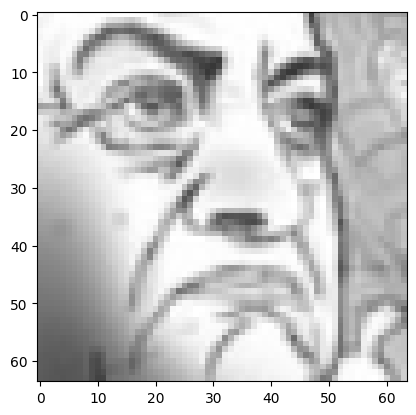

In [23]:
plt.imshow(image_list_arr[5])

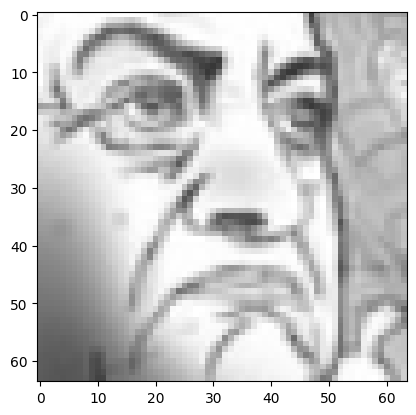

In [24]:
plt.imshow(image_list_arr[5],cmap="gray")

In [25]:
loaded_img_data = np.array(image_list_arr)
loaded_img_data

array([[[[ 46,  46,  46],
         [ 38,  38,  38],
         [ 31,  31,  31],
         ...,
         [ 12,  12,  12],
         [ 16,  16,  16],
         [ 22,  22,  22]],

        [[ 49,  49,  49],
         [ 37,  37,  37],
         [ 27,  27,  27],
         ...,
         [ 11,  11,  11],
         [ 15,  15,  15],
         [ 21,  21,  21]],

        [[ 50,  50,  50],
         [ 36,  36,  36],
         [ 24,  24,  24],
         ...,
         [ 15,  15,  15],
         [ 17,  17,  17],
         [ 21,  21,  21]],

        ...,

        [[211, 211, 211],
         [198, 198, 198],
         [169, 169, 169],
         ...,
         [195, 195, 195],
         [202, 202, 202],
         [204, 204, 204]],

        [[211, 211, 211],
         [203, 203, 203],
         [183, 183, 183],
         ...,
         [186, 186, 186],
         [195, 195, 195],
         [198, 198, 198]],

        [[208, 208, 208],
         [203, 203, 203],
         [190, 190, 190],
         ...,
         [174, 174, 174],
        

RGB values are usually stored as integers to save memory. But doing math on colors is usually done in float because it's easier, more powerful, and more precise. The act of converting floats to integers is called "Quantization", and it throws away precision.

Typically, RGB values are encoded as 8-bit integers, which range from 0 to 255. It's an industry standard to think of 0.0f as black and 1.0f as white (max brightness). To convert [0, 255] to [0.0f, 1.0f] all you have to do is divide by 255.0f.

If you care, this is the formula to convert back to integer: (int)floor(x * 255.0f + 0.5f). But first clamp x to [0.0f, 1.0f] if necessary.

In [26]:
loaded_img_data = loaded_img_data.astype('float32')
loaded_img_data

array([[[[ 46.,  46.,  46.],
         [ 38.,  38.,  38.],
         [ 31.,  31.,  31.],
         ...,
         [ 12.,  12.,  12.],
         [ 16.,  16.,  16.],
         [ 22.,  22.,  22.]],

        [[ 49.,  49.,  49.],
         [ 37.,  37.,  37.],
         [ 27.,  27.,  27.],
         ...,
         [ 11.,  11.,  11.],
         [ 15.,  15.,  15.],
         [ 21.,  21.,  21.]],

        [[ 50.,  50.,  50.],
         [ 36.,  36.,  36.],
         [ 24.,  24.,  24.],
         ...,
         [ 15.,  15.,  15.],
         [ 17.,  17.,  17.],
         [ 21.,  21.,  21.]],

        ...,

        [[211., 211., 211.],
         [198., 198., 198.],
         [169., 169., 169.],
         ...,
         [195., 195., 195.],
         [202., 202., 202.],
         [204., 204., 204.]],

        [[211., 211., 211.],
         [203., 203., 203.],
         [183., 183., 183.],
         ...,
         [186., 186., 186.],
         [195., 195., 195.],
         [198., 198., 198.]],

        [[208., 208., 208.],
       

In [27]:
loaded_img_data = loaded_img_data/255
loaded_img_data

array([[[[0.18039216, 0.18039216, 0.18039216],
         [0.14901961, 0.14901961, 0.14901961],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.08627451, 0.08627451, 0.08627451]],

        [[0.19215687, 0.19215687, 0.19215687],
         [0.14509805, 0.14509805, 0.14509805],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.04313726, 0.04313726, 0.04313726],
         [0.05882353, 0.05882353, 0.05882353],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.14117648, 0.14117648, 0.14117648],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.06666667, 0.06666667, 0.06666667],
         [0.08235294, 0.08235294, 0.08235294]],

        ...,

        [[0.827451  , 0.827451  , 0.827451  ],
         [0.7764706 , 0.7764706 , 0.7764706 ]

In [28]:
loaded_img_data.shape

(35887, 64, 64, 3)

In [29]:
loaded_img_data

array([[[[0.18039216, 0.18039216, 0.18039216],
         [0.14901961, 0.14901961, 0.14901961],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.08627451, 0.08627451, 0.08627451]],

        [[0.19215687, 0.19215687, 0.19215687],
         [0.14509805, 0.14509805, 0.14509805],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.04313726, 0.04313726, 0.04313726],
         [0.05882353, 0.05882353, 0.05882353],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.14117648, 0.14117648, 0.14117648],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.06666667, 0.06666667, 0.06666667],
         [0.08235294, 0.08235294, 0.08235294]],

        ...,

        [[0.827451  , 0.827451  , 0.827451  ],
         [0.7764706 , 0.7764706 , 0.7764706 ]

In [30]:
# loaded_img_data = np.repeat(loaded_img_data[..., np.newaxis], 3, -1)


In [31]:
num_of_samples = loaded_img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:4953]=0 #135
labels[4954:5500]=1 #54
labels[5501:10621]=2 #177
labels[10622:19610]=3 #75
labels[19611:25808]=4 #207
labels[25809:31885]=5 #84
labels[31886:35887]=6 #249

names = ['anger','disgust','fear','happy','neutral','sad','surprise']

def getLabel(id):
    return  ['anger','disgust','fear','happy','neutral','sad','surprise'][id]


In [32]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization


In [33]:
from tensorflow.keras.utils import to_categorical
num_classes = 7
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(loaded_img_data,Y, random_state=8)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=8)
x_test=X_test
print(y_train.shape)

# y_train = to_categorical(y_train, 3)
# y_test = to_categorical(y_test, 3)

(28709, 7)


In [34]:
from keras.preprocessing.image import ImageDataGenerator

#Callbacks
c2=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
# nClasses=3

emotion_train_gen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data_emotion=emotion_train_gen.flow(X_train,y_train, batch_size=64, shuffle=True)
emotion_val_gen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_data_emotion=emotion_train_gen.flow(X_test,y_test, batch_size=64, shuffle=True)

In [23]:
from tensorflow.keras.models import *
from sklearn.model_selection import *
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *

base_Neural_Net= VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

for layer in base_Neural_Net.layers:
    layer.trainable = False

!pip install livelossplot

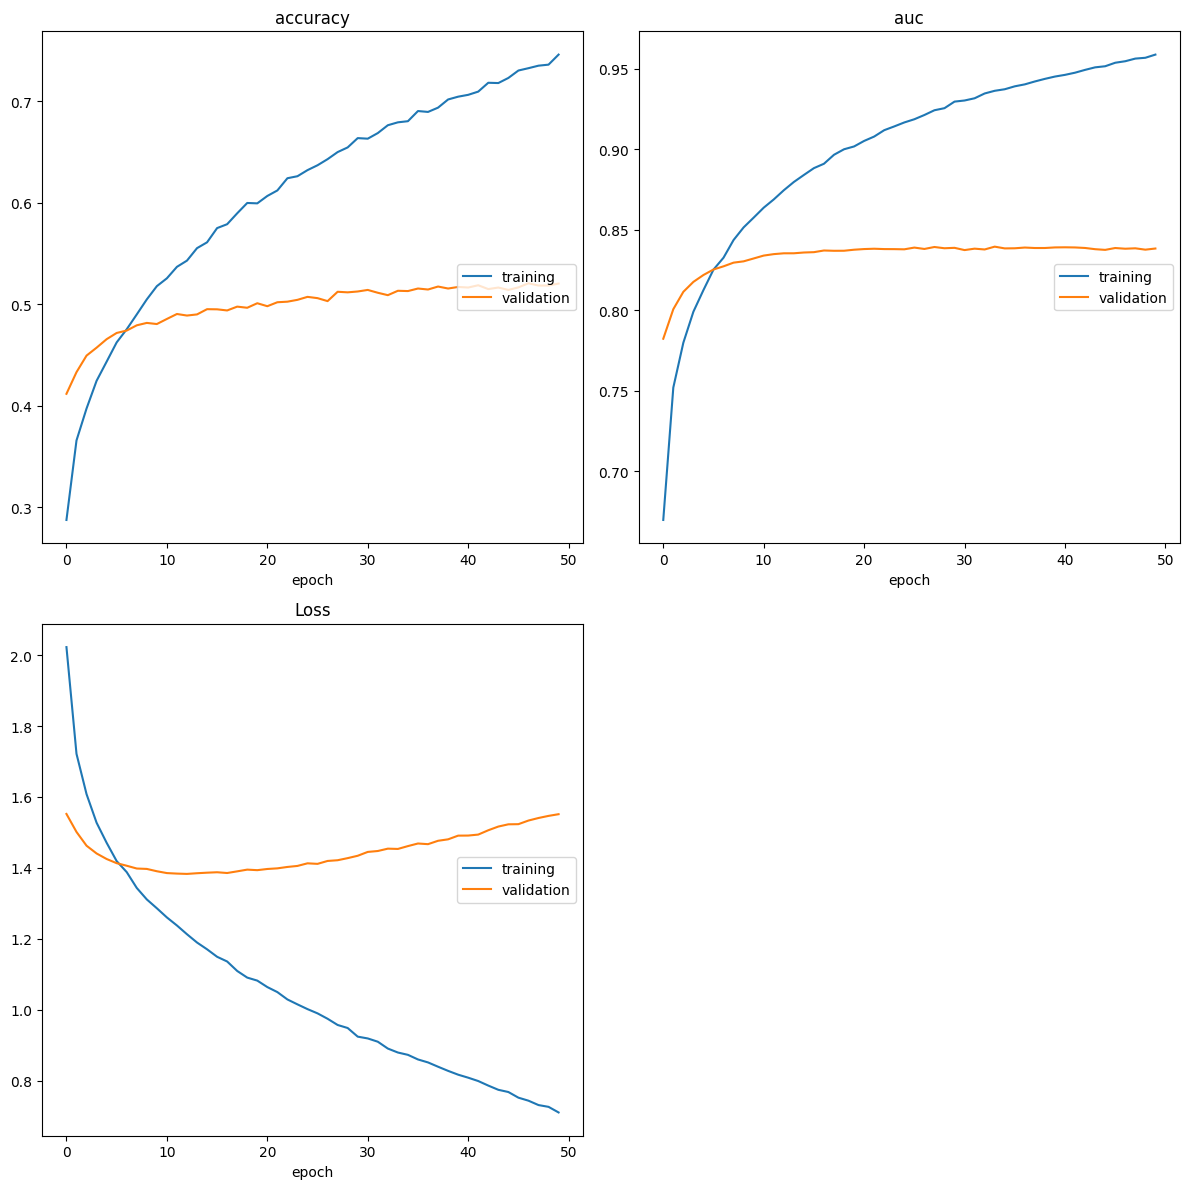

accuracy
	training         	 (min:    0.288, max:    0.746, cur:    0.746)
	validation       	 (min:    0.412, max:    0.521, cur:    0.520)
auc
	training         	 (min:    0.670, max:    0.959, cur:    0.959)
	validation       	 (min:    0.782, max:    0.840, cur:    0.838)
Loss
	training         	 (min:    0.710, max:    2.023, cur:    0.710)
	validation       	 (min:    1.383, max:    1.552, cur:    1.551)


In [24]:
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras

opt = Adam(lr=0.0001)
c1=PlotLossesKeras()
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy','AUC'])
history=model.fit(X_train,y_train,epochs=50,callbacks=[c1,c3],batch_size=64,validation_data=(X_test, y_test))

# from keras import callbacks
# filename='model_train_new.csv'
# filepath="C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/checkpoints.hdf5"

# csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [csv_log,checkpoint]
# callbacks_list = [csv_log]
# hist = model.fit(X_train, y_train, batch_size=2, epochs=25, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

In [25]:

model.evaluate(X_test,y_test,callbacks=[c2,c3],batch_size=64)

113/113 [==============================] - 2s 18ms/step - loss: 1.5514 - accuracy: 0.5203 - auc: 0.8385


[1.5513702630996704, 0.5203399062156677, 0.8384725451469421]

In [26]:
model.save("FER_VGG16.h5")

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import *

models=load_model("FER_VGG16.h5")

In [3]:
from PIL import Image
import glob

def predictor(filename) :
    test_image = filename
    image_result = Image.open(test_image)
    # test_image = image.load_img(test_image, target_size=(100,100))
    test_image = image.load_img(test_image, target_size=(48,48,3))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    result = models.predict(test_image)
    r = np.max(result)
    per = r*100
    percentage = round(per,4)
    categories = ['anger','contempt','disgust','fear','happy','sadness','surprise']
    image_result = plt.imshow(image_result)
    output = categories[np.argmax(result)]
#     output = np.argmax(result)
    return result,percentage,output
EMOTION_DETECTOR = predictor('C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/FER/test/happy/PrivateTest_3402902.jpg')
print(EMOTION_DETECTOR)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/FER/test/happy/PrivateTest_3402902.jpg'

In [5]:
from mtcnn import MTCNN
from PIL import Image
import glob
# load face detector
detector = MTCNN()


In [6]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def detect_face(img):
    
    mt_res = detector.detect_faces(img)
    return_res = []
    
    for face in mt_res:
        x, y, width, height = face['box']
        center = [x+(width/2), y+(height/2)]
        max_border = max(width, height)
        
        # center alignment
        left = max(int(center[0]-(max_border/2)), 0)
        right = max(int(center[0]+(max_border/2)), 0)
        top = max(int(center[1]-(max_border/2)), 0)
        bottom = max(int(center[1]+(max_border/2)), 0)
        
        # crop the face
        center_img_k = img[top:top+max_border, 
                           left:left+max_border, :]
        center_img = np.array(Image.fromarray(center_img_k).resize([64, 64]))
        print("center_img--------------",center_img)

        # create predictions
#         sex_preds = sex_model.predict(center_img.reshape(1,224,224,3))[0][0]
#         age_preds = age_model.predict(center_img.reshape(1,224,224,3))[0][0]

#         test_image = image.load_img(center_img, target_size=(64,64,3))
        test_image = image.img_to_array(center_img)
        test_image = test_image/255
        test_image = np.expand_dims(test_image, axis=0)
        emotion_preds = models.predict(test_image)
        
        # convert to grey scale then predict using the emotion model
#         grey_img = np.array(Image.fromarray(center_img_k).resize([256, 256]))
#         emotion_preds = models.predict(center_img.reshape(1,64,64, 3))
        
        # output to the cv2
        return_res.append([top, right, bottom, left, emotion_preds])
#         return_res.append([top, right, bottom, left, sex_preds, age_preds, emotion_preds])
        
    return return_res

In [9]:
# Get a reference to webcam 
video_capture = cv2.VideoCapture(0)
# print("video_capture--------------",video_capture)

emotion_dict = {
    0: 'anger',
    1: 'disgust', 
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprise'
}

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()
    print("--------------",frame.shape)
    # Convert the image from BGR color (which OpenCV uses) to RGB color 
    rgb_frame = frame[:, :, ::-1]
    print("rgb_frame--------------",rgb_frame.shape)
    # Find all the faces in the current frame of video
    face_locations = detect_face(rgb_frame)
    print("face_locations--------------",face_locations)

    # Display the results
    for top, right, bottom, left, emotion_preds in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        
#         sex_text = 'Female' if sex_preds > 0.5 else 'Male'
#         cv2.putText(frame, 'Sex: {}({:.3f})'.format(sex_text, sex_preds), (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
#         cv2.putText(frame, 'Age: {:.3f}'.format(age_preds), (left, top-25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
        cv2.putText(frame, 'Emotion: {}({:.3f})'.format(emotion_dict[np.argmax(emotion_preds)], np.max(emotion_preds)), (left, top-40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
        
    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[ 34  35  45]
  [ 34  35  45]
  [ 33  34  44]
  ...
  [ 33  32  37]
  [ 30  28  39]
  [ 32  30  42]]

 [[ 32  33  43]
  [ 32  32  42]
  [ 32  32  42]
  ...
  [ 36  35  40]
  [ 31  29  39]
  [ 31  29  42]]

 [[ 33  33  48]
  [ 32  33  45]
  [ 31  31  41]
  ...
  [ 35  37  39]
  [ 30  31  36]
  [ 30  30  38]]

 ...

 [[ 34   5  11]
  [ 67   9  24]
  [ 86   6  27]
  ...
  [ 30  30  30]
  [ 38  38  39]
  [ 51  51  52]]

 [[ 85  10  25]
  [ 97  11  30]
  [ 99  10  30]
  ...
  [ 31  31  31]
  [ 36  36  36]
  [ 51  51  51]]

 [[105  15  32]
  [104  15  31]
  [104  14  31]
  ...
  [ 32  32  32]
  [ 40  40  40]
  [ 53  53  53]]]
face_locations-------------- [[145, 442, 344, 243, array([[8.5087633e-03, 1.8313624e-05, 9.6414030e-02, 2.5136274e-01,
        5.3602010e-01, 1.0759714e-01, 7.8895107e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img----------

center_img-------------- [[[128 125 152]
  [128 125 151]
  [129 125 150]
  ...
  [120 118 131]
  [119 118 131]
  [120 118 132]]

 [[127 125 155]
  [128 124 154]
  [127 122 152]
  ...
  [117 116 133]
  [117 116 133]
  [118 116 132]]

 [[120 122 156]
  [121 120 153]
  [122 118 151]
  ...
  [112 111 135]
  [113 111 134]
  [114 111 134]]

 ...

 [[238  91 120]
  [241  89 117]
  [239  85 116]
  ...
  [174 174 174]
  [186 186 186]
  [187 187 187]]

 [[248  86 119]
  [249  86 119]
  [246  87 119]
  ...
  [173 173 173]
  [185 185 185]
  [189 189 189]]

 [[245  86 120]
  [246  86 120]
  [244  83 117]
  ...
  [178 178 178]
  [183 183 183]
  [190 190 190]]]
face_locations-------------- [[139, 452, 349, 242, array([[9.2417069e-02, 1.0503137e-09, 2.0042490e-02, 1.5686441e-02,
        8.7042910e-01, 1.4246582e-03, 1.8501279e-07]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[126 122 149]
  [127 123 149]
  [127 124 152]
  ...
  [118 1

center_img-------------- [[[126 122 150]
  [127 123 149]
  [130 129 157]
  ...
  [115 112 135]
  [117 113 134]
  [116 113 133]]

 [[119 115 146]
  [123 119 148]
  [132 132 161]
  ...
  [109 110 134]
  [111 108 133]
  [112 108 134]]

 [[117 115 148]
  [124 123 154]
  [132 133 163]
  ...
  [110 109 135]
  [113 110 135]
  [113 110 134]]

 ...

 [[223  65 104]
  [223  65 105]
  [215  65 104]
  ...
  [173 174 171]
  [184 184 183]
  [191 191 191]]

 [[231  68 109]
  [227  67 107]
  [220  67 105]
  ...
  [179 179 179]
  [187 187 187]
  [190 190 190]]

 [[235  78 116]
  [229  70 110]
  [217  63 101]
  ...
  [181 181 181]
  [188 188 187]
  [188 188 188]]]
face_locations-------------- [[144, 453, 343, 254, array([[1.0152526e-02, 2.3957053e-11, 2.5175980e-03, 1.6032255e-01,
        8.2670110e-01, 3.0487916e-04, 1.2778333e-06]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[127 123 150]
  [127 123 149]
  [127 123 149]
  ...
  [118 1

center_img-------------- [[[116 113 132]
  [116 113 132]
  [117 114 133]
  ...
  [111 111 114]
  [112 112 117]
  [112 111 117]]

 [[120 117 133]
  [120 117 133]
  [126 123 140]
  ...
  [117 117 117]
  [118 118 119]
  [117 117 122]]

 [[127 125 137]
  [127 126 136]
  [134 132 145]
  ...
  [122 122 121]
  [121 121 122]
  [120 120 122]]

 ...

 [[233  74 110]
  [234  74 108]
  [228  71 102]
  ...
  [187 187 187]
  [191 191 191]
  [194 194 193]]

 [[237  79 113]
  [233  75 107]
  [222  68  97]
  ...
  [185 185 185]
  [191 191 191]
  [191 191 191]]

 [[239  81 115]
  [230  71 106]
  [220  65  98]
  ...
  [182 182 182]
  [188 188 188]
  [188 188 188]]]
face_locations-------------- [[114, 467, 339, 242, array([[1.7680651e-02, 1.1838525e-11, 4.1835694e-04, 1.6353186e-02,
        9.6470737e-01, 8.4044825e-04, 3.9135266e-08]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[120 118 131]
  [121 119 131]
  [121 119 132]
  ...
  [114 1

center_img-------------- [[[142 142 146]
  [142 141 147]
  [143 142 148]
  ...
  [132 132 132]
  [134 134 134]
  [133 133 133]]

 [[141 139 148]
  [140 139 148]
  [140 139 146]
  ...
  [125 125 126]
  [125 125 125]
  [127 127 126]]

 [[122 120 136]
  [123 120 137]
  [124 122 137]
  ...
  [112 111 117]
  [113 112 117]
  [114 113 118]]

 ...

 [[170  77 105]
  [224  83 116]
  [209  73 107]
  ...
  [192 192 192]
  [198 198 198]
  [202 202 202]]

 [[204  83 116]
  [231  84 117]
  [223  68 106]
  ...
  [189 189 189]
  [195 195 195]
  [200 200 200]]

 [[222  77 113]
  [231  76 110]
  [223  71 106]
  ...
  [188 188 188]
  [196 196 196]
  [197 197 197]]]
face_locations-------------- [[104, 464, 325, 243, array([[1.1853513e-05, 7.4036888e-10, 1.8775242e-04, 4.0146571e-01,
        5.5931014e-01, 3.5302442e-02, 3.7220828e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[127 125 137]
  [128 126 137]
  [128 126 138]
  ...
  [113 1

center_img-------------- [[[130 127 143]
  [135 133 149]
  [139 138 156]
  ...
  [120 119 124]
  [120 119 126]
  [121 121 127]]

 [[138 135 154]
  [141 141 160]
  [132 132 151]
  ...
  [129 127 141]
  [129 127 141]
  [129 127 141]]

 [[138 136 158]
  [140 138 160]
  [123 122 141]
  ...
  [130 128 141]
  [126 125 134]
  [127 126 132]]

 ...

 [[199  81 118]
  [179 132 148]
  [164 152 156]
  ...
  [160 160 160]
  [175 175 175]
  [188 188 188]]

 [[212  63 103]
  [192 101 126]
  [170 139 148]
  ...
  [158 158 158]
  [171 171 171]
  [183 183 183]]

 [[219  66 101]
  [205  73 102]
  [183 118 134]
  ...
  [162 162 162]
  [171 171 171]
  [182 182 182]]]
face_locations-------------- [[125, 456, 327, 254, array([[9.3712340e-05, 8.4955953e-09, 2.2862840e-03, 2.3666540e-01,
        7.4862212e-01, 1.0928200e-02, 1.4042394e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[120 117 134]
  [120 118 135]
  [124 121 139]
  ...
  [112 1

center_img-------------- [[[129 127 142]
  [129 127 142]
  [129 126 143]
  ...
  [122 122 123]
  [122 122 122]
  [122 122 123]]

 [[129 128 142]
  [130 128 143]
  [130 128 143]
  ...
  [123 123 127]
  [122 122 125]
  [123 123 126]]

 [[136 137 161]
  [137 137 159]
  [138 138 156]
  ...
  [128 130 141]
  [130 130 142]
  [131 129 144]]

 ...

 [[180  63  93]
  [215  65 101]
  [221  63 101]
  ...
  [189 189 189]
  [194 194 194]
  [193 193 193]]

 [[237  82 116]
  [236  78 113]
  [233  76 111]
  ...
  [191 191 191]
  [193 193 193]
  [192 192 192]]

 [[247  86 118]
  [244  84 117]
  [237  81 113]
  ...
  [188 188 188]
  [192 192 192]
  [188 188 188]]]
face_locations-------------- [[122, 464, 343, 243, array([[5.4171780e-04, 6.6585563e-11, 4.3623516e-04, 9.2688441e-02,
        9.0585065e-01, 4.8301593e-04, 3.5987460e-09]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[141 138 162]
  [141 138 158]
  [142 139 158]
  ...
  [130 1

center_img-------------- [[[128 124 149]
  [127 124 148]
  [126 122 146]
  ...
  [120 117 133]
  [120 117 133]
  [120 117 133]]

 [[127 123 151]
  [127 121 149]
  [126 121 147]
  ...
  [118 116 133]
  [117 117 133]
  [118 117 134]]

 [[120 118 151]
  [120 115 149]
  [120 114 148]
  ...
  [113 111 132]
  [113 113 132]
  [113 114 133]]

 ...

 [[246  83 117]
  [238  75 105]
  [229  68  96]
  ...
  [190 190 190]
  [189 189 189]
  [181 181 181]]

 [[235  75 107]
  [239  77 107]
  [247  84 113]
  ...
  [190 190 190]
  [189 189 189]
  [174 174 174]]

 [[238  82 109]
  [247  85 114]
  [247  82 114]
  ...
  [189 189 189]
  [188 188 188]
  [173 173 173]]]
face_locations-------------- [[139, 461, 357, 243, array([[4.0526426e-01, 4.3929419e-11, 1.7482179e-01, 2.0484755e-02,
        3.9734399e-01, 2.0809514e-03, 4.2308875e-06]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[120 118 153]
  [132 132 163]
  [120 120 148]
  ...
  [114 1

center_img-------------- [[[126 121 146]
  [127 122 146]
  [134 131 156]
  ...
  [113 114 133]
  [113 115 134]
  [114 116 136]]

 [[118 115 145]
  [123 122 148]
  [134 132 159]
  ...
  [108 111 134]
  [109 110 136]
  [111 110 139]]

 [[115 115 147]
  [126 126 155]
  [128 128 157]
  ...
  [111 112 138]
  [112 111 140]
  [113 110 143]]

 ...

 [[224  64 103]
  [223  66 104]
  [216  67 102]
  ...
  [187 187 187]
  [193 193 193]
  [194 194 194]]

 [[235  74 113]
  [225  71 108]
  [213  64  99]
  ...
  [190 190 190]
  [190 190 190]
  [192 192 192]]

 [[236  78 111]
  [226  70 102]
  [213  62  94]
  ...
  [189 189 189]
  [189 189 189]
  [190 190 190]]]
face_locations-------------- [[144, 457, 347, 254, array([[3.9826855e-03, 1.2508533e-09, 6.5635709e-04, 3.8027000e-01,
        6.1466855e-01, 4.0728375e-04, 1.5161968e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[126 122 148]
  [127 122 148]
  [127 123 150]
  ...
  [118 1

center_img-------------- [[[134 133 166]
  [119 121 150]
  [111 112 140]
  ...
  [113 111 141]
  [112 111 144]
  [111 115 142]]

 [[130 134 174]
  [112 114 149]
  [107 109 139]
  ...
  [115 117 159]
  [109 113 164]
  [111 116 164]]

 [[124 131 174]
  [105 111 146]
  [105 107 141]
  ...
  [165 172 208]
  [165 169 212]
  [169 173 214]]

 ...

 [[216  62 101]
  [200  81 114]
  [177 124 140]
  ...
  [165 165 164]
  [181 181 181]
  [187 187 188]]

 [[225  69 103]
  [205  64  99]
  [179  98 120]
  ...
  [172 172 173]
  [185 185 185]
  [187 187 188]]

 [[226  70 103]
  [204  54  88]
  [169  66  91]
  ...
  [173 173 174]
  [186 186 186]
  [188 188 188]]]
face_locations-------------- [[152, 451, 344, 259, array([[4.0267974e-01, 3.9701445e-07, 6.8735801e-02, 1.5445542e-01,
        3.6986619e-01, 3.7690806e-03, 4.9346761e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[123 122 150]
  [126 121 149]
  [126 123 150]
  ...
  [117 1

center_img-------------- [[[130 132 164]
  [122 122 155]
  [114 113 144]
  ...
  [108 111 139]
  [110 113 138]
  [110 114 137]]

 [[129 134 170]
  [112 116 150]
  [107 110 142]
  ...
  [104 113 150]
  [106 115 154]
  [107 117 155]]

 [[128 133 175]
  [108 114 150]
  [103 110 140]
  ...
  [138 145 188]
  [141 147 198]
  [142 148 201]]

 ...

 [[224  66 101]
  [209  69 100]
  [184 106 122]
  ...
  [175 175 175]
  [185 185 185]
  [191 191 191]]

 [[226  71 102]
  [214  65  95]
  [177  75  96]
  ...
  [180 180 180]
  [188 188 188]
  [188 188 188]]

 [[226  69 101]
  [212  59  90]
  [176  51  78]
  ...
  [177 177 177]
  [188 188 188]
  [189 189 189]]]
face_locations-------------- [[151, 452, 345, 258, array([[3.3907717e-01, 9.4799290e-08, 6.0492285e-02, 1.6810487e-01,
        4.2731661e-01, 4.7643706e-03, 2.4450646e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[118 116 146]
  [118 117 145]
  [130 130 157]
  ...
  [111 1

center_img-------------- [[[116 114 149]
  [124 122 154]
  [131 132 163]
  ...
  [109 111 135]
  [107 112 138]
  [108 112 139]]

 [[114 113 156]
  [126 126 164]
  [126 129 161]
  ...
  [108 113 148]
  [105 116 150]
  [109 116 154]]

 [[116 119 169]
  [127 133 181]
  [116 125 161]
  ...
  [126 135 185]
  [128 139 187]
  [134 139 189]]

 ...

 [[227  67  98]
  [222  63  93]
  [225  61  94]
  ...
  [190 190 190]
  [189 189 189]
  [183 183 183]]

 [[239  74 107]
  [243  84 111]
  [249  88 119]
  ...
  [189 189 189]
  [190 190 190]
  [179 179 179]]

 [[253  85 116]
  [254  86 119]
  [230  87 121]
  ...
  [187 187 187]
  [189 189 189]
  [176 176 176]]]
face_locations-------------- [[150, 460, 356, 254, array([[3.0159175e-01, 1.7944972e-12, 1.0927915e-02, 2.8603619e-02,
        6.5804434e-01, 8.3227485e-04, 5.7790245e-08]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[119 115 146]
  [130 129 159]
  [125 127 156]
  ...
  [112 1

center_img-------------- [[[117 114 153]
  [128 129 164]
  [122 124 155]
  ...
  [109 116 138]
  [109 116 140]
  [109 116 141]]

 [[117 115 162]
  [131 133 175]
  [115 118 151]
  ...
  [109 122 164]
  [110 122 164]
  [111 123 165]]

 [[158 156 198]
  [138 142 185]
  [108 113 150]
  ...
  [188 192 224]
  [192 195 225]
  [196 198 228]]

 ...

 [[224  64  93]
  [221  60  90]
  [219  67  93]
  ...
  [190 190 190]
  [189 189 189]
  [184 184 184]]

 [[238  78 106]
  [243  85 110]
  [245  92 116]
  ...
  [190 190 190]
  [191 191 191]
  [181 181 181]]

 [[250  88 116]
  [252  89 119]
  [228  89 119]
  ...
  [187 187 187]
  [189 189 189]
  [176 176 176]]]
face_locations-------------- [[152, 459, 357, 254, array([[3.9606833e-01, 4.7138470e-11, 4.2589776e-02, 8.8843666e-02,
        4.6940604e-01, 3.0919195e-03, 2.1681164e-07]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[115 113 147]
  [115 116 148]
  [131 129 160]
  ...
  [111 1

center_img-------------- [[[116 117 147]
  [127 130 158]
  [126 130 154]
  ...
  [112 113 133]
  [111 112 136]
  [112 112 139]]

 [[114 119 156]
  [127 134 168]
  [117 123 151]
  ...
  [109 117 149]
  [108 118 152]
  [111 120 158]]

 [[131 134 181]
  [128 142 184]
  [107 118 154]
  ...
  [156 162 205]
  [157 166 207]
  [161 168 209]]

 ...

 [[233  74 106]
  [223  63  97]
  [218  58  94]
  ...
  [189 189 189]
  [189 189 189]
  [187 187 187]]

 [[231  67 102]
  [234  70 103]
  [238  77 108]
  ...
  [190 190 190]
  [189 189 189]
  [182 182 182]]

 [[248  85 118]
  [251  87 118]
  [251  92 119]
  ...
  [189 189 189]
  [190 190 190]
  [180 180 180]]]
face_locations-------------- [[151, 460, 357, 254, array([[1.4654812e-01, 6.0903046e-11, 2.8611554e-02, 4.3012697e-02,
        7.7954245e-01, 2.2851741e-03, 3.5035288e-08]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[129 135 168]
  [115 119 150]
  [114 111 142]
  ...
  [110 1

center_img-------------- [[[116 116 145]
  [116 116 143]
  [117 118 142]
  ...
  [109 106 132]
  [109 107 135]
  [113 111 139]]

 [[113 115 145]
  [112 115 142]
  [117 120 151]
  ...
  [111 111 139]
  [111 108 139]
  [112 109 140]]

 [[114 117 150]
  [113 115 148]
  [124 126 162]
  ...
  [114 119 149]
  [109 111 147]
  [110 112 148]]

 ...

 [[214  86 122]
  [229  86 115]
  [218  73 104]
  ...
  [123 122 126]
  [143 143 144]
  [168 168 168]]

 [[220  80 116]
  [227  74 106]
  [224  69 103]
  ...
  [120 120 122]
  [143 143 143]
  [167 167 167]]

 [[216  63 101]
  [219  60  95]
  [220  62  95]
  ...
  [122 122 123]
  [148 148 148]
  [172 172 172]]]
face_locations-------------- [[146, 445, 341, 250, array([[7.0036747e-02, 2.4805271e-09, 1.2206029e-02, 5.5527166e-02,
        8.5444343e-01, 7.7863131e-03, 3.5108212e-07]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[116 113 146]
  [115 114 145]
  [126 125 153]
  ...
  [111 1

center_img-------------- [[[112 115 149]
  [113 114 148]
  [118 119 152]
  ...
  [110 111 140]
  [111 112 139]
  [111 113 140]]

 [[115 116 153]
  [116 115 152]
  [122 124 161]
  ...
  [108 113 151]
  [111 116 153]
  [107 117 153]]

 [[117 118 167]
  [116 118 165]
  [126 133 176]
  ...
  [133 134 188]
  [134 136 191]
  [132 139 191]]

 ...

 [[247  87 114]
  [241  83 112]
  [232  77 107]
  ...
  [182 182 182]
  [189 189 189]
  [189 189 189]]

 [[246  84 116]
  [238  76 110]
  [226  63  99]
  ...
  [180 180 180]
  [187 187 187]
  [189 189 189]]

 [[235  75 104]
  [231  70  99]
  [236  70 103]
  ...
  [181 181 181]
  [183 183 183]
  [189 189 189]]]
face_locations-------------- [[150, 454, 355, 249, array([[7.6746322e-02, 2.9067044e-12, 7.4308049e-03, 1.9296200e-03,
        9.1306329e-01, 8.2999165e-04, 9.5987007e-10]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[114 114 148]
  [114 115 149]
  [127 130 163]
  ...
  [109 1

center_img-------------- [[[112 117 151]
  [112 115 150]
  [112 114 147]
  ...
  [111 111 137]
  [111 110 138]
  [110 111 139]]

 [[114 119 155]
  [114 116 152]
  [115 115 150]
  ...
  [109 112 144]
  [108 114 146]
  [109 116 149]]

 [[113 117 163]
  [114 117 162]
  [114 114 161]
  ...
  [113 121 166]
  [111 121 170]
  [113 122 174]]

 ...

 [[250  86 117]
  [247  85 115]
  [243  85 114]
  ...
  [160 160 160]
  [176 176 176]
  [188 188 188]]

 [[248  87 116]
  [247  88 115]
  [245  84 112]
  ...
  [167 167 167]
  [178 178 178]
  [185 185 185]]

 [[244  89 118]
  [242  84 113]
  [236  72 105]
  ...
  [175 175 175]
  [181 181 181]
  [182 182 182]]]
face_locations-------------- [[149, 449, 354, 244, array([[3.2030615e-01, 1.2724048e-10, 4.1275117e-01, 1.6216550e-02,
        2.4341476e-01, 7.3108496e-03, 5.7011493e-07]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[124 124 150]
  [125 122 149]
  [124 121 146]
  ...
  [116 1

center_img-------------- [[[116 114 148]
  [116 115 145]
  [129 129 157]
  ...
  [110 112 139]
  [109 113 140]
  [112 113 141]]

 [[115 114 156]
  [117 117 155]
  [131 131 164]
  ...
  [107 112 151]
  [106 114 157]
  [108 117 161]]

 [[127 128 171]
  [129 132 175]
  [130 135 174]
  ...
  [153 159 197]
  [152 158 204]
  [155 161 207]]

 ...

 [[236  80 110]
  [236  75 106]
  [228  69  99]
  ...
  [178 178 178]
  [185 185 185]
  [187 187 187]]

 [[240  83 113]
  [235  76 109]
  [226  67 100]
  ...
  [175 175 176]
  [187 187 187]
  [188 188 188]]

 [[237  78 110]
  [226  65  99]
  [221  57  91]
  ...
  [176 176 176]
  [184 184 184]
  [188 188 188]]]
face_locations-------------- [[151, 453, 352, 252, array([[2.8933921e-01, 1.5378677e-10, 5.2580543e-02, 4.0816911e-02,
        6.1090606e-01, 6.3572112e-03, 2.0040810e-08]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[115 113 151]
  [116 114 148]
  [121 118 147]
  ...
  [111 1

center_img-------------- [[[118 121 151]
  [117 118 149]
  [120 118 149]
  ...
  [112 112 134]
  [112 113 134]
  [114 111 133]]

 [[112 119 149]
  [114 117 146]
  [115 115 146]
  ...
  [109 111 134]
  [109 112 135]
  [112 112 136]]

 [[115 121 156]
  [115 118 152]
  [115 117 152]
  ...
  [110 114 143]
  [111 115 144]
  [109 117 146]]

 ...

 [[247  87 117]
  [245  85 116]
  [239  77 112]
  ...
  [188 188 188]
  [189 189 189]
  [186 186 186]]

 [[238  82 113]
  [235  75 109]
  [234  73 109]
  ...
  [186 186 186]
  [190 190 190]
  [185 185 185]]

 [[224  73 106]
  [234  78 111]
  [243  87 117]
  ...
  [186 186 186]
  [187 187 187]
  [180 180 180]]]
face_locations-------------- [[145, 459, 361, 243, array([[9.5948261e-01, 4.1529185e-14, 6.6776886e-03, 6.8309195e-03,
        2.6860040e-02, 1.4871702e-04, 1.2526715e-08]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[113 115 149]
  [115 113 145]
  [116 114 146]
  ...
  [108 1

center_img-------------- [[[123 118 148]
  [125 119 145]
  [124 119 143]
  ...
  [116 114 130]
  [117 114 132]
  [118 113 134]]

 [[116 114 146]
  [116 114 143]
  [118 115 145]
  ...
  [111 110 134]
  [114 110 136]
  [114 111 137]]

 [[114 117 147]
  [113 115 145]
  [116 116 148]
  ...
  [110 111 140]
  [112 111 140]
  [113 112 141]]

 ...

 [[238  82 115]
  [237  76 113]
  [232  72 112]
  ...
  [186 186 186]
  [189 189 189]
  [192 192 192]]

 [[246  86 118]
  [243  83 117]
  [234  76 108]
  ...
  [189 189 189]
  [190 190 190]
  [191 191 191]]

 [[248  84 118]
  [239  76 110]
  [226  66  94]
  ...
  [186 186 186]
  [190 190 190]
  [190 190 190]]]
face_locations-------------- [[144, 457, 351, 250, array([[5.3846667e-04, 2.3652418e-14, 7.5249052e-05, 2.0429478e-03,
        9.9728942e-01, 5.3992982e-05, 1.9015598e-09]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[127 124 146]
  [127 123 144]
  [127 123 144]
  ...
  [118 1

center_img-------------- [[[154 154 154]
  [164 164 164]
  [183 183 185]
  ...
  [192 192 192]
  [186 186 186]
  [174 174 174]]

 [[150 150 150]
  [160 160 161]
  [173 173 175]
  ...
  [173 173 173]
  [165 165 165]
  [158 158 158]]

 [[151 151 153]
  [163 163 165]
  [161 161 165]
  ...
  [157 157 157]
  [154 154 154]
  [152 152 152]]

 ...

 [[215  58  92]
  [207  55  90]
  [175  76 101]
  ...
  [181 181 181]
  [189 189 189]
  [178 177 177]]

 [[213  54  88]
  [217  57  92]
  [190  53  83]
  ...
  [174 173 173]
  [178 178 178]
  [191 190 190]]

 [[228  65  97]
  [223  64  96]
  [193  44  76]
  ...
  [173 172 172]
  [177 178 177]
  [189 189 189]]]
face_locations-------------- [[75, 492, 314, 253, array([[4.7520790e-03, 5.9901900e-08, 6.6286500e-04, 9.6935934e-01,
        1.6568987e-02, 6.2451311e-03, 2.4115241e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[159 159 160]
  [179 179 181]
  [167 167 169]
  ...
  [189 18

center_img-------------- [[[163 162 169]
  [149 148 157]
  [144 143 150]
  ...
  [157 157 157]
  [154 154 154]
  [152 152 152]]

 [[155 154 158]
  [144 144 150]
  [141 141 144]
  ...
  [149 149 149]
  [147 147 147]
  [145 145 145]]

 [[146 146 149]
  [138 138 143]
  [136 136 139]
  ...
  [143 143 143]
  [142 142 142]
  [139 139 139]]

 ...

 [[184  64  95]
  [161 112 125]
  [150 132 139]
  ...
  [190 190 190]
  [183 184 184]
  [185 186 185]]

 [[201  56  84]
  [176  80 102]
  [153 121 133]
  ...
  [189 189 189]
  [176 177 177]
  [179 179 179]]

 [[218  57  88]
  [185  52  84]
  [149 102 117]
  ...
  [184 184 184]
  [170 171 171]
  [174 174 174]]]
face_locations-------------- [[86, 485, 312, 259, array([[2.4695199e-02, 5.2133652e-07, 1.4080747e-02, 9.1332394e-01,
        2.6952757e-02, 1.6344471e-02, 4.6023987e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[152 152 152]
  [160 160 159]
  [178 178 179]
  ...
  [177 17

center_img-------------- [[[164 163 170]
  [153 152 160]
  [146 146 149]
  ...
  [143 143 143]
  [141 141 141]
  [139 139 139]]

 [[158 157 164]
  [146 145 152]
  [141 140 144]
  ...
  [138 138 138]
  [136 136 136]
  [135 135 135]]

 [[149 148 157]
  [140 139 147]
  [135 134 141]
  ...
  [134 134 134]
  [132 132 132]
  [132 132 132]]

 ...

 [[210  53  88]
  [172  43  70]
  [163  83 105]
  ...
  [177 178 177]
  [189 191 190]
  [120 113 115]]

 [[208  55  86]
  [184  43  75]
  [156  52  85]
  ...
  [176 176 176]
  [185 186 186]
  [154 149 151]]

 [[212  57  84]
  [192  47  77]
  [156  40  72]
  ...
  [165 165 165]
  [181 181 181]
  [179 179 179]]]
face_locations-------------- [[88, 496, 324, 260, array([[6.2424697e-02, 8.4574419e-09, 1.0904455e-04, 8.7743956e-01,
        3.8263735e-03, 5.6054346e-02, 1.4587794e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[144 144 145]
  [147 147 149]
  [159 158 164]
  ...
  [155 15

center_img-------------- [[[148 147 152]
  [144 142 152]
  [132 132 138]
  ...
  [156 156 156]
  [155 155 155]
  [155 155 155]]

 [[144 144 150]
  [135 133 145]
  [129 128 134]
  ...
  [148 148 148]
  [148 148 148]
  [147 147 147]]

 [[142 141 147]
  [129 127 138]
  [124 123 131]
  ...
  [142 142 142]
  [142 142 142]
  [141 141 141]]

 ...

 [[222  65  99]
  [226  65  98]
  [228  65  98]
  ...
  [186 186 186]
  [187 187 187]
  [169 169 169]]

 [[224  64  96]
  [222  61  93]
  [221  60  93]
  ...
  [187 187 187]
  [188 188 188]
  [165 165 165]]

 [[235  69 100]
  [231  68  99]
  [224  63  93]
  ...
  [185 185 185]
  [186 186 186]
  [164 164 164]]]
face_locations-------------- [[87, 478, 324, 241, array([[2.0030454e-01, 8.3999161e-08, 1.7365111e-02, 4.6667349e-01,
        1.8598278e-01, 1.2964228e-01, 3.1743672e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[139 139 141]
  [142 141 147]
  [129 128 138]
  ...
  [153 15

center_img-------------- [[[135 135 136]
  [147 146 149]
  [155 154 161]
  ...
  [188 188 188]
  [185 185 185]
  [179 179 179]]

 [[140 140 142]
  [150 150 155]
  [148 147 154]
  ...
  [171 171 171]
  [169 169 169]
  [165 165 165]]

 [[142 141 145]
  [153 152 159]
  [142 141 149]
  ...
  [160 160 160]
  [159 159 159]
  [156 156 156]]

 ...

 [[204  59  94]
  [221  63  97]
  [226  67  98]
  ...
  [189 189 189]
  [173 173 173]
  [178 178 178]]

 [[227  67 101]
  [229  65  99]
  [231  66  97]
  ...
  [188 188 188]
  [167 167 167]
  [171 171 171]]

 [[234  71 107]
  [232  68 102]
  [227  63  95]
  ...
  [186 186 186]
  [165 165 165]
  [166 166 166]]]
face_locations-------------- [[79, 482, 322, 239, array([[1.2811907e-01, 2.1374784e-09, 1.3259331e-03, 5.9814703e-01,
        2.4031663e-01, 3.1924210e-02, 1.6711465e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[154 153 160]
  [142 141 149]
  [137 136 142]
  ...
  [167 16

center_img-------------- [[[148 148 148]
  [158 158 158]
  [173 173 173]
  ...
  [190 190 190]
  [185 185 185]
  [173 173 173]]

 [[147 147 147]
  [162 162 163]
  [163 163 167]
  ...
  [174 174 174]
  [166 166 166]
  [161 161 161]]

 [[152 152 154]
  [163 163 168]
  [154 153 161]
  ...
  [161 161 161]
  [157 157 157]
  [155 155 155]]

 ...

 [[233  69 104]
  [234  68 103]
  [230  67 101]
  ...
  [181 181 181]
  [186 187 186]
  [191 193 192]]

 [[230  66 100]
  [229  66  99]
  [228  64  97]
  ...
  [173 172 172]
  [182 183 182]
  [191 191 191]]

 [[231  68 101]
  [226  66  96]
  [224  63  94]
  ...
  [163 163 163]
  [173 174 173]
  [187 188 187]]]
face_locations-------------- [[76, 492, 321, 247, array([[5.6879604e-01, 4.7958276e-10, 4.6610943e-04, 2.4939966e-01,
        1.4760909e-02, 1.6597763e-01, 5.9966894e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[152 152 152]
  [162 162 161]
  [176 176 176]
  ...
  [189 18

center_img-------------- [[[147 147 147]
  [153 153 153]
  [170 169 173]
  ...
  [172 172 172]
  [165 165 165]
  [160 160 160]]

 [[149 149 151]
  [157 157 160]
  [164 163 170]
  ...
  [161 161 161]
  [158 158 158]
  [154 154 154]]

 [[148 148 151]
  [160 159 165]
  [156 155 163]
  ...
  [154 154 154]
  [149 149 149]
  [147 147 147]]

 ...

 [[230  64  97]
  [229  64  95]
  [228  63  96]
  ...
  [164 165 164]
  [174 174 174]
  [187 187 187]]

 [[240  73 105]
  [234  68  99]
  [230  65  98]
  ...
  [160 160 160]
  [172 172 172]
  [183 183 183]]

 [[245  75 108]
  [243  74 105]
  [237  70 101]
  ...
  [160 160 160]
  [171 171 171]
  [181 181 181]]]
face_locations-------------- [[79, 494, 327, 246, array([[6.8687171e-01, 4.5660867e-11, 4.0782434e-05, 1.8103261e-02,
        8.5280174e-03, 2.8644669e-01, 9.5605947e-06]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[145 145 145]
  [145 145 148]
  [146 146 149]
  ...
  [167 16

center_img-------------- [[[153 153 153]
  [160 160 160]
  [179 179 180]
  ...
  [202 202 202]
  [193 193 193]
  [188 188 188]]

 [[149 149 149]
  [163 163 163]
  [174 174 177]
  ...
  [182 182 182]
  [177 177 177]
  [169 169 169]]

 [[152 152 153]
  [165 165 166]
  [165 165 169]
  ...
  [167 167 167]
  [163 163 163]
  [158 158 158]]

 ...

 [[212  54  89]
  [217  58  89]
  [195  62  91]
  ...
  [196 197 197]
  [192 191 191]
  [192 191 191]]

 [[228  65 101]
  [227  63  96]
  [203  51  84]
  ...
  [196 195 195]
  [188 189 188]
  [186 186 186]]

 [[232  68 103]
  [228  67  98]
  [203  51  82]
  ...
  [192 193 193]
  [182 184 183]
  [181 182 182]]]
face_locations-------------- [[75, 489, 315, 249, array([[3.2475363e-02, 1.7291530e-08, 5.9479970e-02, 8.5910070e-01,
        9.9266665e-03, 3.8863547e-02, 1.5363589e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[153 153 153]
  [160 160 160]
  [178 178 179]
  ...
  [205 20

center_img-------------- [[[148 148 149]
  [160 160 161]
  [173 173 176]
  ...
  [183 183 183]
  [178 178 178]
  [171 171 171]]

 [[150 149 155]
  [163 162 168]
  [165 164 172]
  ...
  [168 168 168]
  [164 164 164]
  [159 159 159]]

 [[151 150 155]
  [164 163 171]
  [154 153 161]
  ...
  [159 159 159]
  [156 156 156]
  [153 153 153]]

 ...

 [[219  59  89]
  [220  58  91]
  [206  56  88]
  ...
  [195 195 195]
  [192 191 190]
  [186 188 187]]

 [[232  68 101]
  [229  66  99]
  [208  54  88]
  ...
  [193 192 192]
  [188 187 187]
  [180 182 182]]

 [[227  64  98]
  [224  63  96]
  [210  55  88]
  ...
  [192 191 191]
  [185 185 185]
  [181 182 181]]]
face_locations-------------- [[79, 487, 318, 248, array([[1.8125001e-02, 5.8382094e-10, 7.4898686e-05, 9.7467077e-01,
        4.6737366e-03, 2.2516607e-03, 2.0384364e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[126 124 135]
  [138 136 149]
  [138 135 149]
  ...
  [122 12

center_img-------------- [[[119 119 146]
  [114 112 137]
  [112 108 135]
  ...
  [109 108 138]
  [108 110 137]
  [111 112 139]]

 [[116 117 145]
  [110 109 135]
  [110 106 134]
  ...
  [110 110 141]
  [110 112 141]
  [111 114 143]]

 [[111 112 143]
  [108 107 135]
  [108 105 132]
  ...
  [110 114 148]
  [114 117 153]
  [112 117 154]]

 ...

 [[214  70 100]
  [209  65  94]
  [187  74 101]
  ...
  [110 110 113]
  [149 149 150]
  [172 172 172]]

 [[228  71 106]
  [228  69 103]
  [207  65  98]
  ...
  [113 113 115]
  [149 149 150]
  [178 178 177]]

 [[220  62  95]
  [225  62  95]
  [224  68 101]
  ...
  [117 117 118]
  [153 153 153]
  [177 177 177]]]
face_locations-------------- [[147, 445, 334, 258, array([[1.0584759e-01, 1.4469859e-06, 3.1472561e-01, 5.1817656e-01,
        5.0437462e-02, 1.0795426e-02, 1.5980797e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[110 112 140]
  [110 106 136]
  [108 103 134]
  ...
  [106 1

center_img-------------- [[[118 118 145]
  [128 127 153]
  [123 119 144]
  ...
  [109 108 134]
  [111 110 139]
  [112 110 142]]

 [[118 119 149]
  [129 129 156]
  [117 114 140]
  ...
  [108 111 139]
  [108 112 143]
  [108 112 147]]

 [[123 122 153]
  [125 126 152]
  [111 111 137]
  ...
  [107 113 148]
  [104 114 151]
  [108 115 153]]

 ...

 [[146  49  77]
  [213  61  96]
  [227  66 101]
  ...
  [183 183 182]
  [188 188 188]
  [191 191 192]]

 [[215  73 104]
  [234  71 107]
  [234  69 102]
  ...
  [185 185 185]
  [188 188 189]
  [190 190 190]]

 [[232  78 108]
  [234  72 107]
  [234  69 103]
  ...
  [187 187 187]
  [187 187 187]
  [188 188 188]]]
face_locations-------------- [[146, 447, 342, 251, array([[5.7420236e-01, 7.9059793e-11, 3.6306653e-02, 1.6688904e-02,
        3.2078385e-01, 5.2018192e-02, 4.1604949e-08]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[111 107 141]
  [106 102 134]
  [103 101 132]
  ...
  [106 1

center_img-------------- [[[ 96 105 143]
  [ 96 101 134]
  [ 93  98 134]
  ...
  [244 243 250]
  [242 242 244]
  [241 241 244]]

 [[ 99 103 144]
  [ 96  99 137]
  [ 91  98 130]
  ...
  [209 215 240]
  [243 243 248]
  [241 241 242]]

 [[ 97 101 140]
  [ 92 101 138]
  [ 91  97 131]
  ...
  [147 167 210]
  [235 242 251]
  [242 242 243]]

 ...

 [[238  78 109]
  [229  69 102]
  [221  62  94]
  ...
  [180 180 180]
  [185 185 185]
  [188 188 188]]

 [[225  61  93]
  [219  56  87]
  [229  66  99]
  ...
  [181 181 181]
  [186 186 186]
  [187 187 187]]

 [[236  73 103]
  [244  85 109]
  [247  95 122]
  ...
  [182 182 182]
  [182 182 182]
  [180 180 180]]]
face_locations-------------- [[167, 435, 356, 246, array([[4.8605241e-02, 3.4648795e-10, 8.6578250e-01, 2.1704381e-02,
        1.2896406e-02, 5.1010922e-02, 4.8828798e-07]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[ 92 111 150]
  [ 95 104 141]
  [ 93 100 139]
  ...
  [133 1

center_img-------------- [[[ 96 109 148]
  [ 88 104 144]
  [ 88  99 140]
  ...
  [ 85  90 117]
  [ 87  95 122]
  [ 89  97 134]]

 [[ 97 110 151]
  [ 89 103 145]
  [ 88  97 141]
  ...
  [ 85  90 115]
  [ 84  93 121]
  [ 88  97 132]]

 [[ 96 109 152]
  [ 92 102 145]
  [ 88  98 142]
  ...
  [ 83  89 115]
  [ 81  93 126]
  [ 83  96 131]]

 ...

 [[161  46  72]
  [136  29  56]
  [ 72  22  42]
  ...
  [166 166 166]
  [161 161 161]
  [160 160 160]]

 [[160  39  69]
  [112  25  52]
  [ 53  27  40]
  ...
  [164 164 164]
  [161 161 161]
  [148 148 148]]

 [[144  32  62]
  [ 82  21  44]
  [ 42  30  42]
  ...
  [163 163 163]
  [149 149 149]
  [140 140 140]]]
face_locations-------------- [[187, 447, 382, 252, array([[4.3088943e-02, 1.2142379e-10, 7.8134954e-02, 7.2447205e-05,
        1.1206801e-02, 8.6749643e-01, 4.3391256e-07]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[127 153 193]
  [ 96 109 158]
  [ 92 104 145]
  ...
  [ 87  

center_img-------------- [[[107 124 167]
  [103 119 158]
  [100 112 150]
  ...
  [ 97 101 133]
  [ 96 104 134]
  [ 97 108 139]]

 [[106 125 170]
  [102 119 159]
  [100 111 154]
  ...
  [ 92  97 131]
  [ 91 100 134]
  [ 94 105 140]]

 [[107 125 169]
  [103 118 160]
  [103 111 157]
  ...
  [ 91  97 129]
  [ 93 100 134]
  [ 94 103 137]]

 ...

 [[180  56  81]
  [153  44  66]
  [ 85  32  49]
  ...
  [178 178 178]
  [178 178 178]
  [175 175 175]]

 [[167  56  82]
  [116  34  55]
  [ 65  33  45]
  ...
  [178 178 178]
  [180 180 180]
  [169 169 169]]

 [[140  41  66]
  [ 88  27  48]
  [ 56  33  47]
  ...
  [176 176 176]
  [166 166 166]
  [157 157 157]]]
face_locations-------------- [[196, 445, 392, 249, array([[1.7705886e-05, 6.6119425e-17, 3.6909859e-04, 5.2604641e-09,
        1.2514608e-03, 9.9836177e-01, 4.7044196e-12]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[107 118 158]
  [102 113 153]
  [ 99 111 150]
  ...
  [ 94  

center_img-------------- [[[108 119 163]
  [102 112 153]
  [101 110 147]
  ...
  [ 95  99 127]
  [ 97 100 132]
  [ 98 103 136]]

 [[106 117 163]
  [103 111 154]
  [101 111 146]
  ...
  [ 93  97 124]
  [ 92  98 129]
  [ 91 102 135]]

 [[103 119 166]
  [102 113 156]
  [103 111 149]
  ...
  [ 89  94 124]
  [ 90  99 128]
  [ 91 102 132]]

 ...

 [[169  55  85]
  [122  34  59]
  [ 64  31  44]
  ...
  [178 178 178]
  [177 177 177]
  [171 171 171]]

 [[143  44  72]
  [ 89  26  48]
  [ 55  34  43]
  ...
  [177 177 177]
  [174 174 174]
  [166 166 166]]

 [[116  26  51]
  [ 76  29  44]
  [ 57  33  44]
  ...
  [173 173 173]
  [159 159 159]
  [153 153 153]]]
face_locations-------------- [[200, 445, 396, 249, array([[3.56666205e-05, 6.92375567e-18, 5.67744137e-05, 1.14081695e-08,
        1.35863549e-04, 9.99771655e-01, 5.43318483e-13]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[ 99 115 157]
  [100 111 152]
  [ 99 108 148]
  ...
 

center_img-------------- [[[111 118 154]
  [108 114 149]
  [106 112 145]
  ...
  [ 84  84 110]
  [ 88  86 114]
  [ 88  87 112]]

 [[105 113 150]
  [102 108 146]
  [ 99 104 141]
  ...
  [ 85  83 110]
  [ 88  84 113]
  [ 88  86 114]]

 [[ 96 106 147]
  [ 92  99 142]
  [ 91  96 138]
  ...
  [ 84  83 108]
  [ 85  85 111]
  [ 87  84 115]]

 ...

 [[ 62  35  48]
  [ 53  38  47]
  [ 47  40  46]
  ...
  [186 186 186]
  [179 179 179]
  [178 178 178]]

 [[ 52  36  47]
  [ 52  36  44]
  [ 50  36  42]
  ...
  [185 185 185]
  [175 175 175]
  [179 179 179]]

 [[ 51  35  45]
  [ 51  35  43]
  [ 50  36  43]
  ...
  [182 182 182]
  [167 167 167]
  [173 173 173]]]
face_locations-------------- [[216, 434, 394, 256, array([[3.4224752e-02, 9.1106517e-07, 2.8906735e-02, 6.5471302e-03,
        6.9610976e-02, 8.6063361e-01, 7.5897347e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[109 121 163]
  [ 99 114 158]
  [101 107 153]
  ...
  [ 91  

center_img-------------- [[[110 122 163]
  [104 114 158]
  [100 109 148]
  ...
  [ 90  90 116]
  [ 94  95 122]
  [ 94  95 125]]

 [[109 123 161]
  [104 114 157]
  [101 111 147]
  ...
  [ 86  88 114]
  [ 88  91 118]
  [ 89  93 121]]

 [[110 126 164]
  [103 117 159]
  [100 112 149]
  ...
  [ 86  87 114]
  [ 87  89 117]
  [ 89  95 122]]

 ...

 [[138  47  70]
  [113  27  50]
  [ 70  29  48]
  ...
  [175 175 175]
  [170 170 170]
  [163 163 163]]

 [[141  51  77]
  [114  30  55]
  [ 75  28  49]
  ...
  [173 173 173]
  [165 165 165]
  [155 155 155]]

 [[138  44  72]
  [128  31  59]
  [ 88  27  46]
  ...
  [170 170 170]
  [168 168 168]
  [157 157 157]]]
face_locations-------------- [[206, 443, 404, 245, array([[2.5314573e-04, 1.9242216e-13, 1.1717865e-03, 2.4223065e-03,
        2.5003925e-02, 9.7114885e-01, 4.2552117e-09]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[105 118 157]
  [101 111 149]
  [100 110 148]
  ...
  [ 87  

center_img-------------- [[[150 148 168]
  [151 150 169]
  [155 156 176]
  ...
  [141 139 157]
  [140 142 158]
  [138 141 156]]

 [[144 141 164]
  [148 147 168]
  [156 154 174]
  ...
  [139 136 156]
  [140 138 156]
  [139 138 154]]

 [[142 138 163]
  [150 147 171]
  [152 148 172]
  ...
  [138 135 154]
  [138 135 153]
  [138 135 154]]

 ...

 [[213 104 133]
  [195 161 172]
  [181 177 176]
  ...
  [204 204 204]
  [209 209 209]
  [210 210 210]]

 [[220  84 114]
  [210 122 143]
  [191 167 173]
  ...
  [200 200 200]
  [205 205 205]
  [208 208 208]]

 [[231  79 111]
  [217  86 118]
  [201 136 155]
  ...
  [201 201 201]
  [204 204 204]
  [204 204 204]]]
face_locations-------------- [[132, 453, 338, 247, array([[1.2594332e-01, 6.2898501e-08, 5.4794986e-02, 8.8966243e-02,
        7.2730225e-01, 1.1948355e-03, 1.7983109e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[145 141 166]
  [152 151 176]
  [145 148 171]
  ...
  [138 1

center_img-------------- [[[170 180 202]
  [110 117 145]
  [100 101 136]
  ...
  [167 159 148]
  [172 164 154]
  [175 166 159]]

 [[133 147 184]
  [101 113 146]
  [ 97 101 133]
  ...
  [167 158 145]
  [173 163 153]
  [177 166 157]]

 [[120 129 166]
  [101 110 144]
  [ 93 100 134]
  ...
  [166 158 145]
  [173 163 153]
  [176 166 156]]

 ...

 [[ 39  37  42]
  [ 95  95  95]
  [125 127 127]
  ...
  [203 157 130]
  [207 157 127]
  [211 159 130]]

 [[ 40  32  36]
  [ 93  87  90]
  [126 125 127]
  ...
  [212 165 137]
  [207 160 131]
  [207 157 127]]

 [[ 42  30  36]
  [ 90  79  85]
  [122 120 123]
  ...
  [213 164 137]
  [212 164 138]
  [209 159 133]]]
face_locations-------------- [[166, 579, 422, 323, array([[1.5528630e-01, 6.0008883e-06, 4.2530764e-03, 2.1613266e-02,
        1.8230678e-01, 6.3653302e-01, 1.6046678e-06]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[114 114 150]
  [127 132 162]
  [117 121 145]
  ...
  [183 1

center_img-------------- [[[117 118 140]
  [109 111 129]
  [ 99 100 113]
  ...
  [133 133 130]
  [143 139 132]
  [151 144 133]]

 [[113 113 139]
  [104 104 125]
  [ 97  96 112]
  ...
  [134 134 132]
  [146 141 135]
  [151 143 135]]

 [[110 110 136]
  [ 99  99 119]
  [ 91  90 106]
  ...
  [138 136 134]
  [152 142 137]
  [156 141 135]]

 ...

 [[137 118 124]
  [137 125 128]
  [133 128 130]
  ...
  [ 53  54  53]
  [ 55  50  52]
  [ 90  65  69]]

 [[138 106 116]
  [137 119 125]
  [132 127 129]
  ...
  [ 68  69  68]
  [ 45  46  45]
  [ 59  53  53]]

 [[134  94 104]
  [137 118 126]
  [134 124 127]
  ...
  [ 92  92  92]
  [ 43  39  40]
  [ 52  43  46]]]
face_locations-------------- [[138, 513, 363, 288, array([[2.6029795e-02, 8.6895252e-06, 1.6621988e-02, 5.0790101e-01,
        3.0859746e-02, 4.1857532e-01, 3.4326088e-06]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[113 111 128]
  [122 119 136]
  [117 115 133]
  ...
  [ 92  

center_img-------------- [[[119 119 138]
  [117 115 133]
  [116 113 132]
  ...
  [103 101 114]
  [100 100 105]
  [111 111 112]]

 [[118 116 137]
  [116 113 133]
  [113 110 132]
  ...
  [102 100 116]
  [100  99 108]
  [111 111 113]]

 [[112 112 134]
  [111 110 130]
  [112 109 130]
  ...
  [100  97 120]
  [100  97 113]
  [111 111 116]]

 ...

 [[244  71  99]
  [233  68  94]
  [217  55  82]
  ...
  [174 174 174]
  [153 153 153]
  [156 156 156]]

 [[234  63  95]
  [225  57  90]
  [223  55  86]
  ...
  [168 168 168]
  [148 148 148]
  [153 153 153]]

 [[224  56  86]
  [224  53  87]
  [235  64  98]
  ...
  [158 158 158]
  [148 147 147]
  [152 152 152]]]
face_locations-------------- [[140, 486, 377, 249, array([[2.8494635e-01, 6.0143726e-08, 1.0875467e-01, 4.5441948e-02,
        4.4027218e-01, 1.2056873e-01, 1.6049496e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[121 117 140]
  [118 114 138]
  [114 110 134]
  ...
  [101 1

center_img-------------- [[[133 131 152]
  [137 135 160]
  [136 134 155]
  ...
  [101 101 101]
  [101 101 101]
  [118 118 118]]

 [[129 126 148]
  [137 135 163]
  [131 130 153]
  ...
  [ 99  99 101]
  [ 98  98  99]
  [117 117 117]]

 [[129 126 146]
  [136 133 159]
  [123 121 147]
  ...
  [ 97  97  98]
  [ 97  97  97]
  [117 117 116]]

 ...

 [[229  66  97]
  [215  61  87]
  [192  44  72]
  ...
  [179 179 179]
  [177 177 177]
  [179 180 180]]

 [[224  61  94]
  [219  57  89]
  [205  53  82]
  ...
  [173 173 173]
  [176 177 176]
  [181 180 180]]

 [[233  67 104]
  [226  59  97]
  [210  52  85]
  ...
  [166 166 166]
  [171 171 171]
  [180 179 179]]]
face_locations-------------- [[134, 487, 360, 261, array([[2.6699360e-02, 3.8101749e-05, 3.0080138e-02, 3.3462864e-01,
        5.0426966e-01, 1.0424375e-01, 4.0319606e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[134 131 150]
  [140 137 158]
  [135 131 155]
  ...
  [101 1

center_img-------------- [[[134 130 149]
  [134 130 150]
  [137 134 153]
  ...
  [103 103 105]
  [101 101 101]
  [106 106 106]]

 [[127 124 148]
  [129 125 150]
  [136 132 158]
  ...
  [101 101 105]
  [ 99  99 101]
  [103 103 103]]

 [[125 121 147]
  [127 123 148]
  [134 131 157]
  ...
  [ 99  97 107]
  [ 98  98 101]
  [100 100 100]]

 ...

 [[238  73 101]
  [233  69  98]
  [228  65  96]
  ...
  [179 179 179]
  [168 168 168]
  [179 177 178]]

 [[244  77 106]
  [242  77 108]
  [236  71 102]
  ...
  [177 177 177]
  [166 167 167]
  [170 172 171]]

 [[243  78 109]
  [237  72 103]
  [227  60  92]
  ...
  [173 173 173]
  [159 159 159]
  [160 161 161]]]
face_locations-------------- [[134, 485, 365, 254, array([[1.4795414e-02, 4.3870880e-09, 8.7198464e-04, 5.7301328e-02,
        9.0018934e-01, 2.6841415e-02, 4.4228207e-07]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[135 133 152]
  [136 134 152]
  [140 137 157]
  ...
  [102 1

In [80]:
from sklearn.metrics import confusion_matrix
results = models.predict(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
# cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [74]:
X_test

array([[[[0.41960785, 0.41960785, 0.41960785],
         [0.41960785, 0.41960785, 0.41960785],
         [0.41960785, 0.41960785, 0.41960785],
         ...,
         [0.05490196, 0.05490196, 0.05490196],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.06666667, 0.06666667, 0.06666667]],

        [[0.40784314, 0.40784314, 0.40784314],
         [0.42352942, 0.42352942, 0.42352942],
         [0.43137255, 0.43137255, 0.43137255],
         ...,
         [0.03529412, 0.03529412, 0.03529412],
         [0.05098039, 0.05098039, 0.05098039],
         [0.06666667, 0.06666667, 0.06666667]],

        [[0.3764706 , 0.3764706 , 0.3764706 ],
         [0.42352942, 0.42352942, 0.42352942],
         [0.44313726, 0.44313726, 0.44313726],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.03921569, 0.03921569, 0.03921569],
         [0.05490196, 0.05490196, 0.05490196]],

        ...,

        [[0.23137255, 0.23137255, 0.23137255],
         [0.27058825, 0.27058825, 0.27058825]

In [55]:
labels[25555]

4

In [63]:
y_pred8=models.predict(X_test)
y_pred8[0]

array([0.07177595, 0.0021401 , 0.2898135 , 0.08839343, 0.00877552,
       0.5366388 , 0.00246275], dtype=float32)

In [64]:
y_test8=[np.argmax(x) for x in y_test]
y_pred8[0]

array([0.07177595, 0.0021401 , 0.2898135 , 0.08839343, 0.00877552,
       0.5366388 , 0.00246275], dtype=float32)

In [65]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)